<a href="https://colab.research.google.com/github/Shubbair/Bosten-House-Prices-Prediction/blob/main/bosten_house_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn import (
    model_selection,
    metrics,
    linear_model,
    ensemble,
    svm
)

In [2]:
SEED = 42
np.random.seed(SEED)

# Data Processing

In [3]:
dataset = pd.read_csv('/content/boston.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
dataset.describe(include='all').T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
CRIM,506.000000,3.613524,8.601545,0.006320,0.082045,0.256510,3.677083,88.976200
ZN,506.000000,11.363636,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000
INDUS,506.000000,11.136779,6.860353,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,506.000000,0.069170,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.000000,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
RM,506.000000,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
AGE,506.000000,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
DIS,506.000000,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
RAD,506.000000,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.000000,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000


#### check is data has null or value

In [6]:
dataset.isnull().mean() * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

### correlation of the data

In [7]:
corr_mat = dataset.corr()

<Axes: >

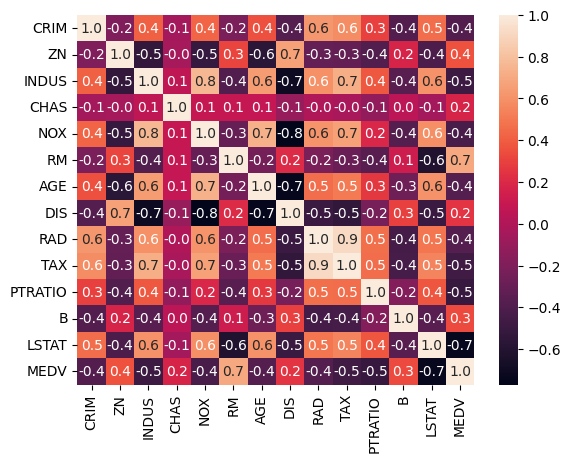

In [8]:
sns.heatmap(corr_mat,annot=True,fmt='1.1f')

### relation between every two column 

In [9]:
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat.abs().idxmax()

CRIM         RAD
ZN           DIS
INDUS        NOX
CHAS        MEDV
NOX          DIS
RM          MEDV
AGE          DIS
DIS          NOX
RAD          TAX
TAX          RAD
PTRATIO     MEDV
B            RAD
LSTAT       MEDV
MEDV       LSTAT
dtype: object

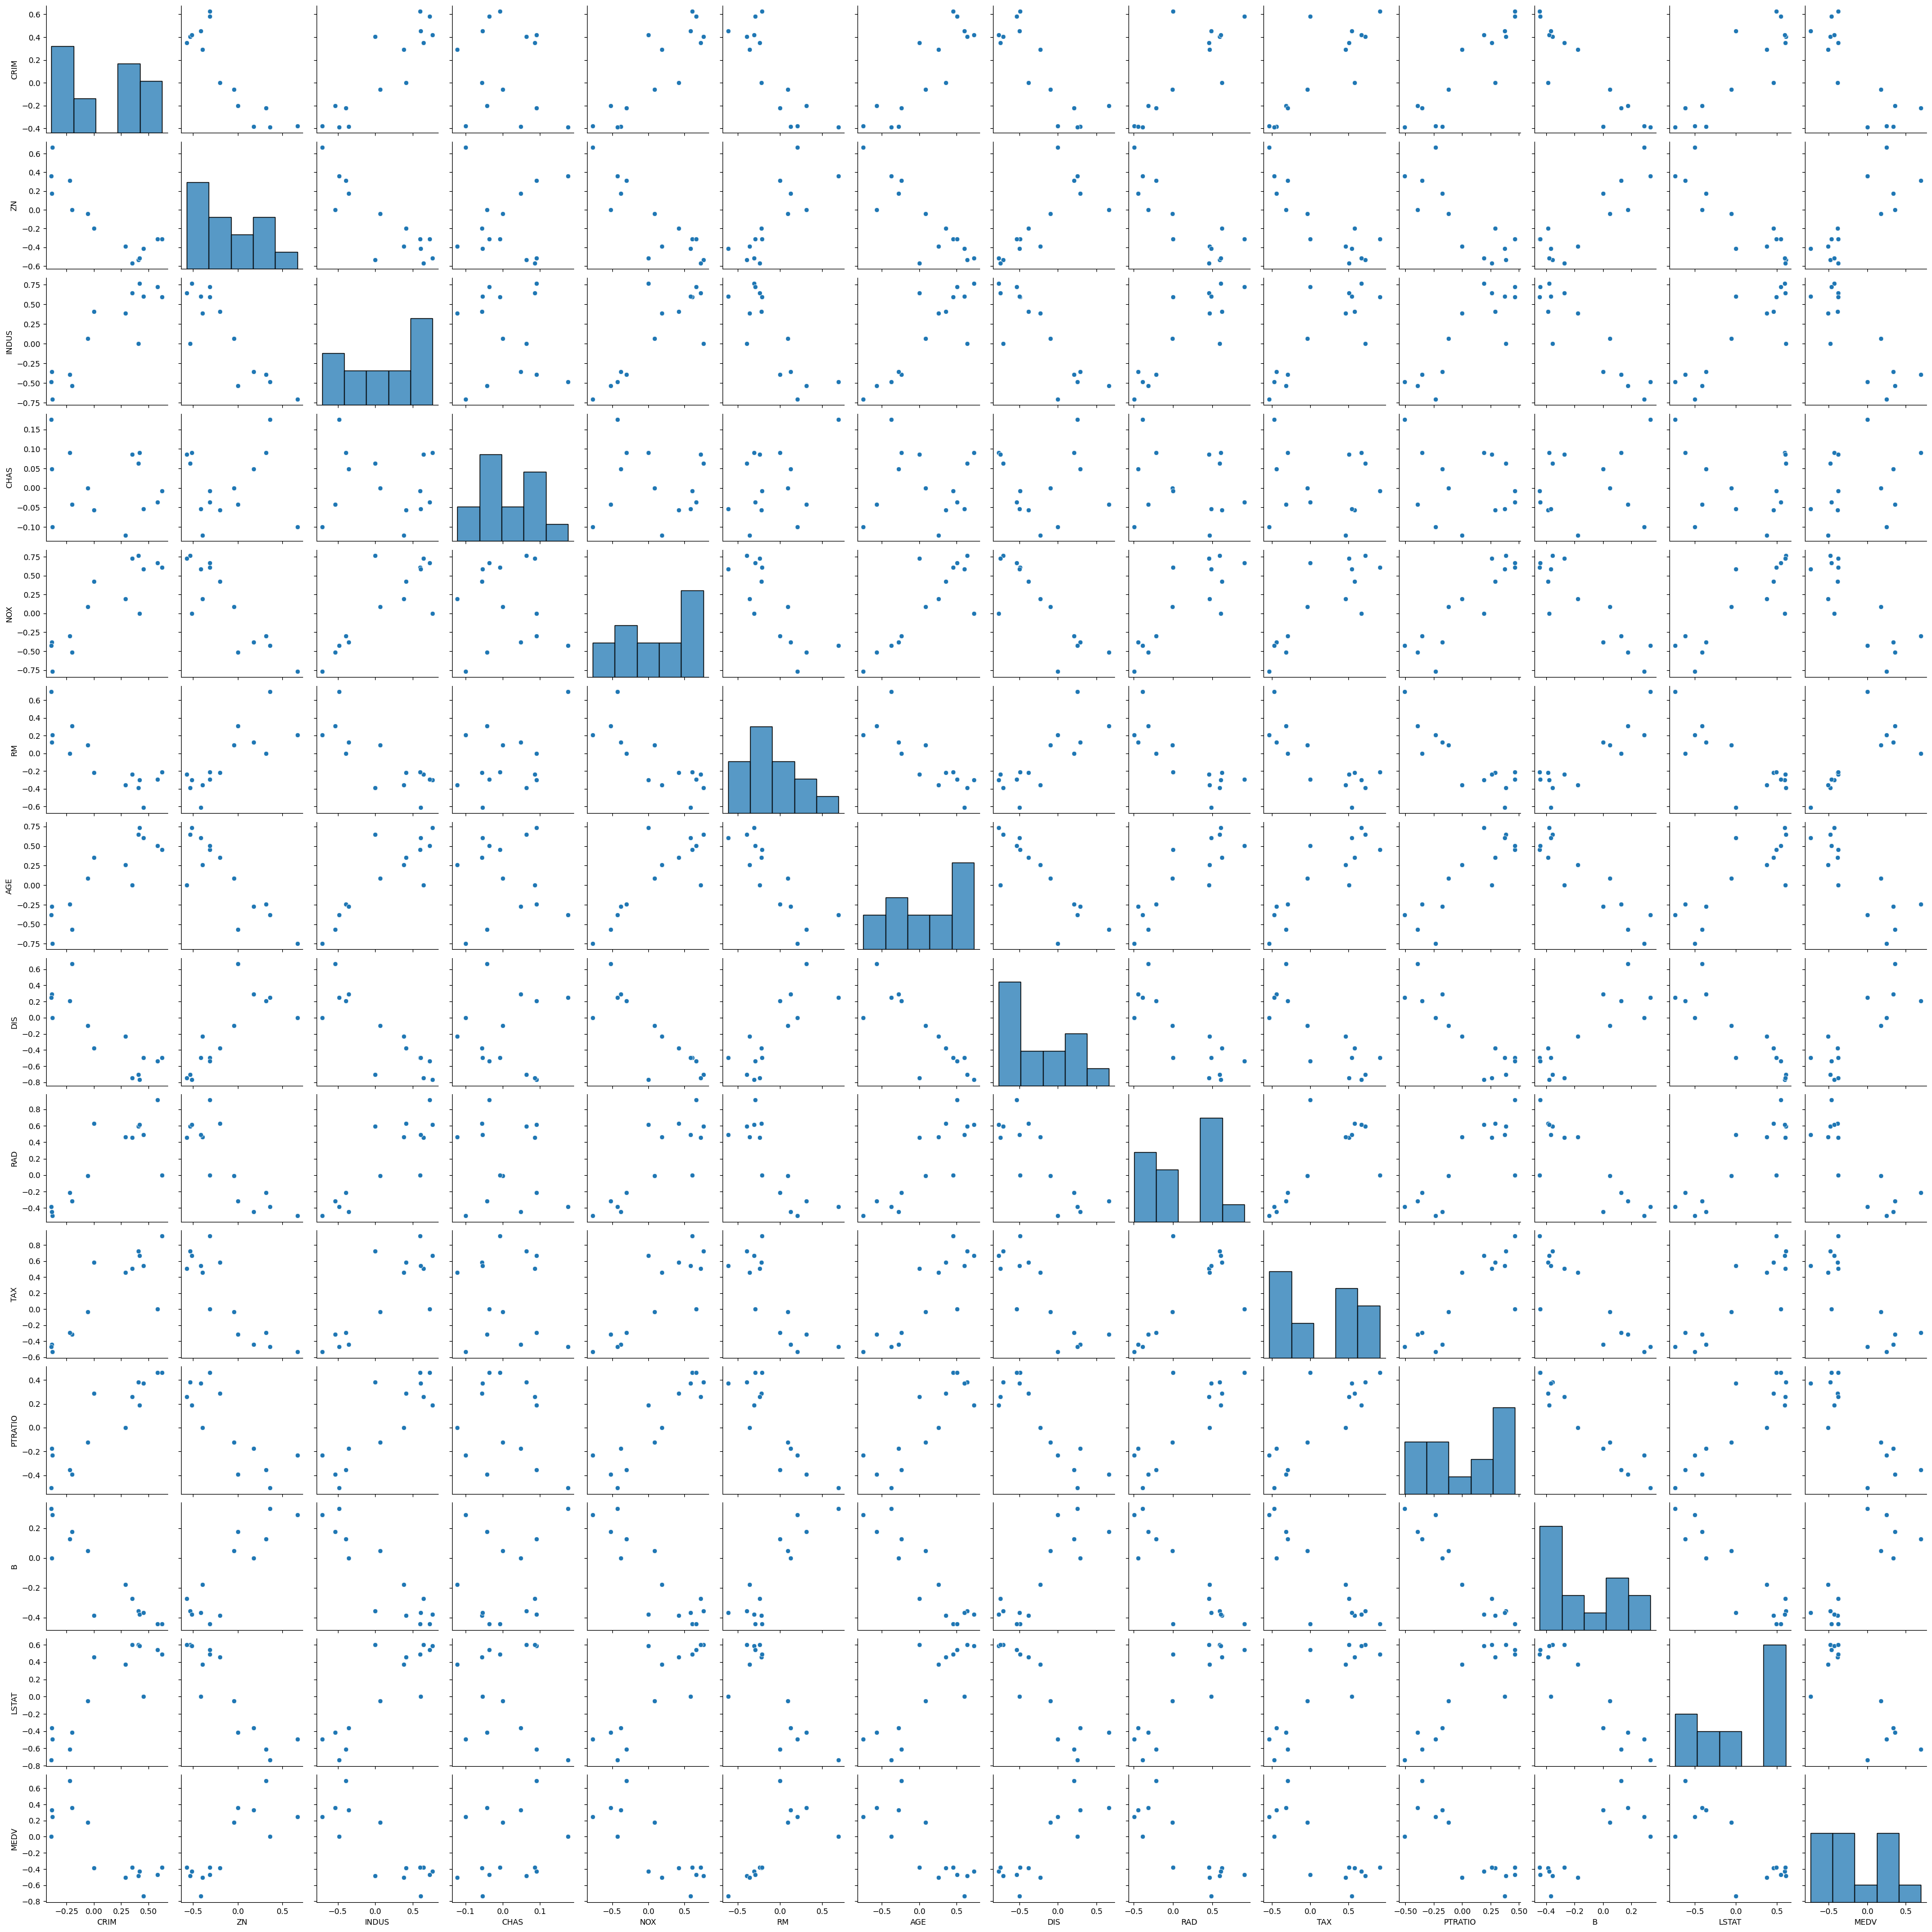

In [10]:
sns.pairplot(corr_mat)

#### Average number of rooms per dwelling

<Axes: title={'center': 'Average Number of Rooms Per Dwelling'}>

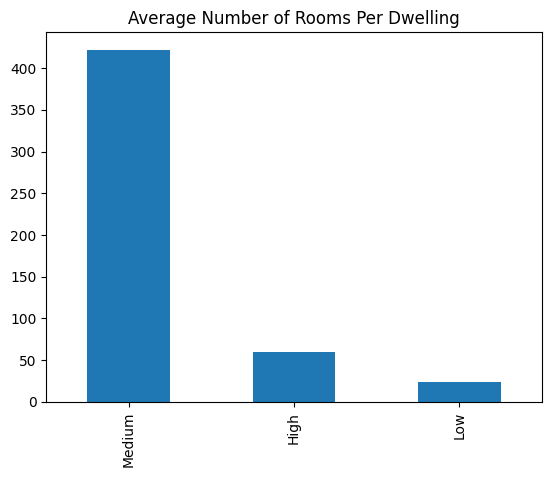

In [11]:
RM = pd.cut(dataset['RM'],bins=3,labels = ['Low','Medium','High'])
RM.value_counts().plot.bar(title = 'Average Number of Rooms Per Dwelling')

### MEDV vs RM 

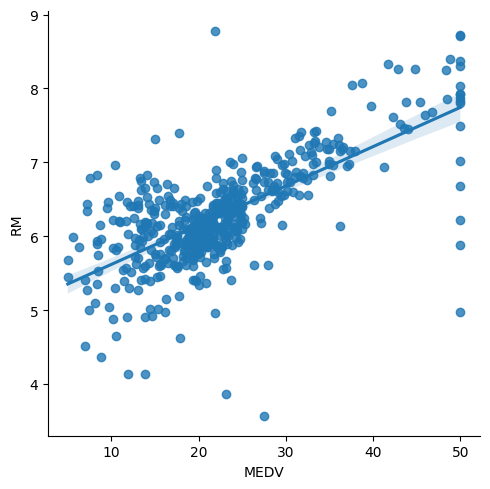

In [12]:
sns.lmplot(x="MEDV",y="RM",data=dataset)

### MEDV distribution

<Axes: xlabel='MEDV', ylabel='Count'>

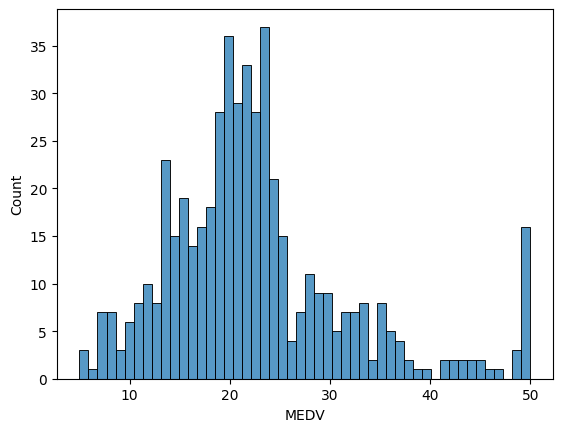

In [13]:
sns.histplot(x="MEDV",data=dataset,bins=50)

### Split Data Into Train , Test

In [14]:
x = dataset.drop("MEDV",axis=1)
y = dataset["MEDV"]

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, random_state=SEED)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

# Modeling

## Linear Regression

In [15]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [16]:
lr_pred = linear_regression.predict(x_test)

In [17]:
lr_sqr_error = metrics.mean_squared_error(y_test,lr_pred)

print('Linear Regression MSE :- ',lr_sqr_error)

Linear Regression MSE :-  22.09869482709832


## SVR

In [18]:
svr_model = svm.SVR()
svr_model.fit(x_train,y_train)

SVR()

In [19]:
svr_pred = svr_model.predict(x_test)

In [20]:
svr_sqr_error = metrics.mean_squared_error(y_test,svr_pred)

print('SVR MSE :- ',svr_sqr_error)

SVR MSE :-  49.28419516700926


## Random Forest Regressor

In [21]:
rfr_model = ensemble.RandomForestRegressor()
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
rfr_pred = rfr_model.predict(x_test)

In [23]:
rfr_sqr_error = metrics.mean_squared_error(y_test,rfr_pred)

print('Random Forest Regressor MSE :- ',rfr_sqr_error)

Random Forest Regressor MSE :-  10.324669748031488


## XGBoost Regressor

In [24]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
xgb_pred = xgb_model.predict(x_test)

In [26]:
xgb_sqr_error = metrics.mean_squared_error(y_test,xgb_pred)

print('XGBoost Regressor MSE :- ',xgb_sqr_error)

XGBoost Regressor MSE :-  10.061069900863131


# Model Evaluation

In [27]:
print("Linear Regression Error:",np.sqrt(lr_sqr_error))
print("Support Vector Machine Error:",np.sqrt(svr_sqr_error))
print("Random Forest Regressor Error:",np.sqrt(rfr_sqr_error))
print("XGBoost Regressor Error:",np.sqrt(xgb_sqr_error))

Linear Regression Error: 4.700924890603797
Support Vector Machine Error: 7.020270305836468
Random Forest Regressor Error: 3.2132024131746646
XGBoost Regressor Error: 3.1719189619003716


#### we see that XGBoost has minimum error value